# Bonus Challenge: Color code your graph

If you finish the first notebook, try this advanced challenge. Pick a characteristic from the dataset (ex: depth, magnitude AKA "EQ_Primary", Deaths), and write code that color codes the points on your graph according to that characteristic.

## Data Setup
You'll need to repeat the data setup from the last notebook:

In [1]:
import matplotlib.pyplot as plt

In [2]:
all_quakes = open("allquakes_cleaned.txt")
all_quakes.readline()

# The \t in between each column name lets you know that this text file is separated by tabs

'YEAR\tFOCAL_DEPTH\tEQ_PRIMARY\tCOUNTRY\tSTATE\tLOCATION_NAME\tLATITUDE\tLONGITUDE\tREGION_CODE\tDEATHS\tDAMAGE_MILLIONS_DOLLARS\tHOUSES_DESTROYED\tHOUSES_DESTROYED_DESCRIPTION\tHOUSES_DAMAGED\n'

In [3]:
quakes_list = []
for i in all_quakes:
    quakes_list.append(i.split('\t')) # The .split() method separates the items in each line

In [4]:
print(len(quakes_list))

4596


## Selecting your data
In this section you'll decide which data you need for your project. 

First create your empty list. You will need to create two new lists in addition to the latitude and longitude lists: 
1. A list of the colors for each data point
2. A list of the value for each data point (magnitude, depth, etc).

In [5]:
lats = []
lons = []
data_values = []
colors = []

First, fill in the latitude, longitude, and data value lists just like in the first Notebook. Remember to select your range of years and your region.



Region codes:
- Africa: 10
- Central America: 100
- Central and South Pacific: 170
- North America: 150
- South America: 160

**Note:** You may need to add another conditional statement to exclude quakes in your list that do not have any value listed for the characteristic you selected.

**Note:** If you are checking multiple conditions, you can string them together using **and** instead of nesting multiple if statements. Try it out!

In [6]:
# In this example I will be looking at magnitude for all North American quakes between 1900 and 2000:
for i in quakes_list:
    if int(i[8]) == 150 and 1900 <= int(i[0]) <= 2000 and i[2] != "":
        lats.append(float(i[6]))
        lons.append(float(i[7]))
        data_values.append(float(i[2]))

Print out the length of your latitude and longitude lists. Does this result make sense?

In [7]:
print(len(lats))
print(len(lons))

210
210


## Creating your color list
In order to color code your data points, you will need to create a list that contains the right color for each point. 

It wouldn't be very informative to make each data point a different color, though... Think about a color range (ex. yellow to red or light purple to dark purple) that would make sense for the characteristic you chose.

Once you've picked your color range, you'll need to decide how to split up your data points (ie. 1/3 yellow, 1/3 orange, 1/3 red). Here's where the list of data values comes in.

Print out the min and max of your data values for the characteristic you picked:

In [8]:
print(min(data_values))
print(max(data_values))

3.5
9.2


Now it's time to fill in your colors list!

Write a "for loop" that loops through the list of data values and appends the correct color to the data list based on a series of conditionals. (For example, you may decide that all values between 1 and 3 are yellow, all values between 4 and 6 are orange, and all values between 7 and 9 are red).

**Note:** You can use any color from this list: https://i.stack.imgur.com/lFZum.png Make sure to put it in quotes!

In [9]:
for i in data_values:
    if i <= 5:
        colors.append("yellow")
    elif i <= 7:
        colors.append("orange")
    else:
        colors.append("red")

## Making your graph
Now it's time to make the color coded scatter plot!

Copy and paste your graphing code from the first Notebook. All you need to change to apply your new coloring is to set c equal to the name of your colors list.

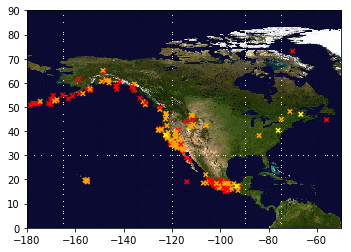

In [10]:
plt.clf()

# This code adds an image behind your plot
image = plt.imread("earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])

# This code crops the image to show only your region. 
# IMPORTANT: Replace the coordinates in plt.xlim and plt.ylim functions
# To match your region using the key above
plt.xlim(-180,-50)
plt.ylim(0,90)

# Create a scatter plot using plt.scatter(). 
# You can change the size, shape, and color of your markers! 
# Try adding s = #, marker = "symbol", and c = "color"
plt.scatter(lons, lats, s = 20, marker = "x", c = colors)
plt.show()